In [1]:
#data preprocessing
import pandas as pd
#math operations
import numpy as np
#machine learning

from sklearn.preprocessing import StandardScaler
#hyperparameter optimization
from sklearn.model_selection import GridSearchCV
#support vector machine model
from keras import regularizers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
            
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
import random


In [2]:
!git clone https://github.com/sahilabudhwani/ML-Detection-for-Malaria.git

Cloning into 'ML-Detection-for-Malaria'...
remote: Enumerating objects: 27571, done.
remote: Counting objects: 100% (27571/27571), done.
remote: Compressing objects: 100% (27570/27570), done.
remote: Total 27571 (delta 2), reused 27566 (delta 0), pack-reused 0
Receiving objects: 100% (27571/27571), 331.67 MiB | 41.77 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Checking out files: 100% (27562/27562), done.


In [119]:
  img= Image.open(r'/content/ML-Detection-for-Malaria/Malaria_Dataset/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png')
  print(img.size)
  img=img.resize((50,50))
  print(img.size) 
  

(142, 148)
(50, 50)


In [134]:
import fnmatch 
data=[]
labels=[]

Parasitized=fnmatch.filter(os.listdir("/content/ML-Detection-for-Malaria/Malaria_Dataset/Parasitized"), '*png')
for a in Parasitized: 
    img= Image.open(r'/content/ML-Detection-for-Malaria/Malaria_Dataset/Parasitized/' +a)
    img=img.resize((50,50)) 
    data.append(np.asarray(img))
    labels.append(0)
  


Uninfected=fnmatch.filter(os.listdir("/content/ML-Detection-for-Malaria/Malaria_Dataset/Uninfected"), '*png')
for u in Uninfected: 
    img= Image.open(r'/content/ML-Detection-for-Malaria/Malaria_Dataset/Uninfected/' +u)
    img=img.resize((50,50)) 
    data.append(np.asarray(img))
    labels.append(1)
    

In [135]:
Cells=np.array(data)
labels=np.array(labels)
print(Cells.shape, labels.shape)

(27558, 50, 50, 3) (27558,)


In [136]:
Cells=np.stack(data)
labels=np.stack(labels)
print(Cells.shape, labels.shape)

(27558, 50, 50, 3) (27558,)


In [137]:
np.save("Cells",Cells)
np.save("labels",labels)

In [138]:
Cells=np.load("Cells.npy",allow_pickle=True)
labels=np.load("labels.npy",allow_pickle=True)

In [139]:
num_classes = 2

labels = keras.utils.to_categorical(labels, num_classes)
print(labels[0])

[1. 0.]


In [144]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(Cells, labels, test_size = 0.1, random_state=5)
print('Train dataset number: {}'.format(len(x_train)))
print('Test dataset number: {}'.format(len(x_val)))

Train dataset number: 24802
Test dataset number: 2756


In [147]:
#creating sequential model
model = Sequential()
model.add(Conv2D(20, kernel_size=(2, 2),
                 activation='sigmoid',
                 input_shape=(50, 50, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(30, kernel_size=(3,3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.15))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 49, 49, 20)        260       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 24, 24, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 22, 22, 30)        5430      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 11, 11, 30)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 3630)              0         
                                                                 
 dropout_14 (Dropout)        (None, 3630)             

In [148]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [132]:
print(type(x_train))

<class 'list'>


In [149]:


history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=1,                    
                    verbose=1,
                    validation_data=(x_val, y_val))

776/776 [==============================] - 48s 61ms/step - loss: 0.4702 - accuracy: 0.7626 - val_loss: 0.3217 - val_accuracy: 0.8788


In [150]:
batch_size = 30
epochs = 10

callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    callbacks = callbacks_list,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/10
826/827 [============================>.] - ETA: 0s - loss: 0.2348 - accuracy: 0.9195
Epoch 1: val_loss improved from inf to 0.20801, saving model to model.h5
827/827 [==============================] - 52s 63ms/step - loss: 0.2349 - accuracy: 0.9194 - val_loss: 0.2080 - val_accuracy: 0.9390
Epoch 2/10
826/827 [============================>.] - ETA: 0s - loss: 0.2076 - accuracy: 0.9299
Epoch 2: val_loss improved from 0.20801 to 0.17241, saving model to model.h5
827/827 [==============================] - 50s 61ms/step - loss: 0.2076 - accuracy: 0.9299 - val_loss: 0.1724 - val_accuracy: 0.9445
Epoch 3/10
826/827 [============================>.] - ETA: 0s - loss: 0.2098 - accuracy: 0.9271
Epoch 3: val_loss improved from 0.17241 to 0.16476, saving model to model.h5
827/827 [==============================] - 48s 59ms/step - loss: 0.2098 - accuracy: 0.9271 - val_loss: 0.1648 - val_accuracy: 0.9430
Epoch 4/10
826/827 [============================>.] - ETA: 0s - loss: 0.1839 - accurac

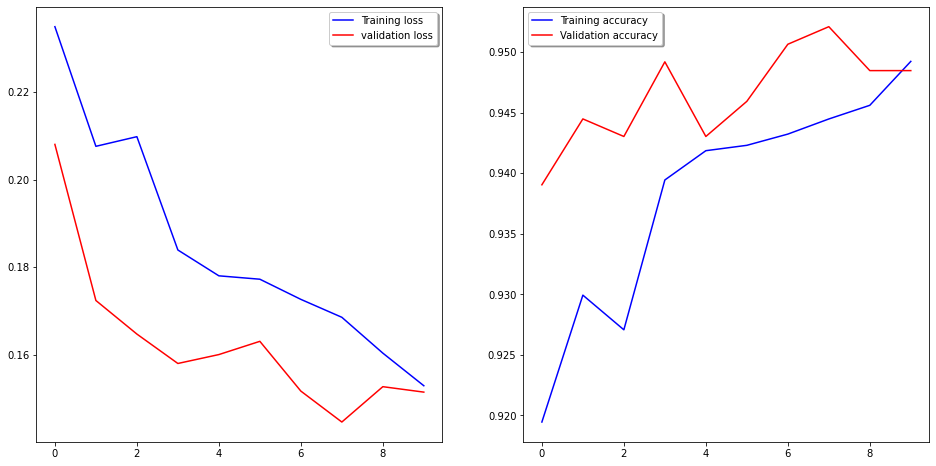

In [157]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [152]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')

In [153]:
score = model.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13380329310894012
Test accuracy: 0.9564586281776428


In [155]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix
Classification Report
              precision    recall  f1-score   support

  Uninfected       0.96      0.96      0.96      1420
   Parasited       0.95      0.96      0.96      1336

    accuracy                           0.96      2756
   macro avg       0.96      0.96      0.96      2756
weighted avg       0.96      0.96      0.96      2756



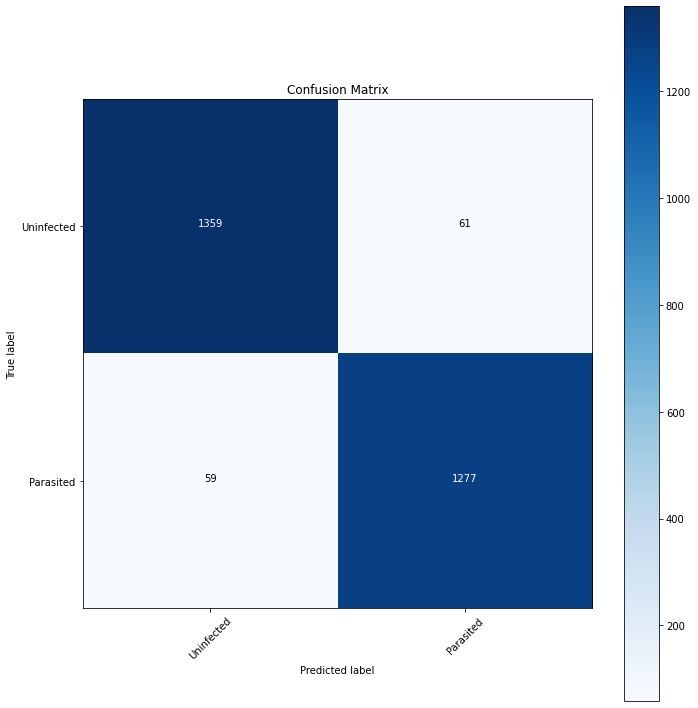

In [156]:
import numpy as np

y_pred = (model.predict(x_val) > 0.5).astype("int32")

y_test_c = np.argmax(y_val, axis=1)
target_names = ["Uninfected", "Parasited"]

Y_pred = np.argmax(model.predict(x_val),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_c, Y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

print('Classification Report')
print(classification_report(y_test_c, Y_pred, target_names=target_names))